# CodeClause_Task-1

# Name of Project- Loan Prediction


Description- In a data science project involving loan prediction, you will have to predict whether or not a loan will get approved. Before starting this project, it is important to understand that among all industries that use data science, the insurance domain makes use of analytics and methods of data science on a very large scale. Before you begin working on this project, you must know how the industry works, the challenges it faces, and the strategies that are used.
Programming Languages- Python, R
Dataset- https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

In [3]:
# Import required Libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import pickle
import sklearn
import transformers
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
#Load data
loan_train = pd.read_csv('C:/Users/Harshavardhan REDDY/Desktop/CodeClause/train_u6lujuX_CVtuZ9i.csv')

# Data Pre-processing

In [5]:
# Initialize Gender predictor columns list
GENDER_PREDICTOR_COLUMNS = ['Dependents', 'ApplicantIncome', 'LoanAmount', 'Property_Area', 'Gender']

In [6]:
# Let's get the rows not having null values on gender column
samples_without_null_values_on_gender_column = loan_train[~loan_train['Gender'].isnull()][GENDER_PREDICTOR_COLUMNS]
print("Number of Samples Before dropping samples having null values in predictor columns for Gender column: ",samples_without_null_values_on_gender_column.shape[0])

Number of Samples Before dropping samples having null values in predictor columns for Gender column:  601


In [7]:
# Dropping samples having null values in predictor columns
samples_without_null_values_on_gender_column = samples_without_null_values_on_gender_column.dropna(how = 'any')
print("Number of Samples After dropping samples having null values in predictor columns for Gender column: ", samples_without_null_values_on_gender_column.shape[0])

Number of Samples After dropping samples having null values in predictor columns for Gender column:  566


In [8]:
# Conveting categorical values on Dependents column to numerical values
samples_without_null_values_on_gender_column['Dependents'] = samples_without_null_values_on_gender_column['Dependents'].apply(
    lambda x : {'0': 0, '1':1, '2':2, '3+':3}[x]
)

In [9]:
# Conveting categorical values on Property_Area column to numerical values
samples_without_null_values_on_gender_column['Property_Area'] = samples_without_null_values_on_gender_column['Property_Area'].apply(
    lambda x : {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[x])

In [10]:
# Building Gender Predictor using Pipeline and KNeigborsClassifiers
Gender_predictor = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('gen_predictor', KNeighborsClassifier(n_neighbors = 1))
])
Gender_predictor.fit(samples_without_null_values_on_gender_column.iloc[:, :-1].values,
                    samples_without_null_values_on_gender_column.iloc[:, -1].values)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gen_predictor', KNeighborsClassifier(n_neighbors=1))])

In [11]:
Gender_predictor.fit(samples_without_null_values_on_gender_column.iloc[:, :-1].values,
                    samples_without_null_values_on_gender_column.iloc[:, -1].values)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gen_predictor', KNeighborsClassifier(n_neighbors=1))])

In [12]:
def gender_null_value_filler(df, Gender_predictor):
    for row in range(df.shape[0]):
        if df.loc[row, 'Gender'] is np.nan:
            X = loan_train.loc[row, GENDER_PREDICTOR_COLUMNS[:-1]].values.reshape(1, -1)
            X[0][0] = {'0': 0, '1':1, '2':2, '3+':3}[X[0][0]]
            X[0][3] = {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[X[0][3]]
            df.loc[row, 'Gender'] = Gender_predictor.predict(X)
    return df

In [13]:
# TODO : Filling null values on Gender columns optimally
loan_train = gender_null_value_filler(loan_train, Gender_predictor)


In [14]:
loan_train['Gender'].isnull().values.any()

False

In [15]:
# TODO : Encoding Gender Column - Male : 1, Female : 0
loan_train['Gender'].replace('Female',0,inplace=True)
loan_train['Gender'].replace('Male',1,inplace=True)

In [16]:
# Let's fill null values in Married columns with 'Yes'
loan_train['Married'] = loan_train['Married'].fillna('Yes')

In [17]:
# TODO : encoding categorical values into numerical values
loan_train['Married'] = loan_train['Married'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

In [18]:
# TODO : Function for filling null values on dependents columns
def dependents_null_value_filler(df):
    for row in range(df.shape[0]):
        if df.loc[row, 'Dependents'] is np.nan:
            df.loc[row, 'Dependents'] = str(df.loc[row, 'Married'])
    return df

In [19]:
# TODO : Fill null values on Dependents column
loan_train = dependents_null_value_filler(loan_train)

In [20]:
# TODO : Encoding Categorical data into NUmerical Data
loan_train['Dependents'] = loan_train['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

In [21]:
# TODO : Encoding categorical data into Numerical data
loan_train['Education'] = loan_train['Education'].apply(lambda x : {'Graduate' : 1, 'Not Graduate' : 0}[x])

In [22]:
# TODO : Filling Null values with No on Self_Employed column
loan_train['Self_Employed'].fillna(value = 'No', inplace = True)

# TODO : Encoding Self_Employed as 1 and Not Self_Employed as 0
loan_train['Self_Employed'] = loan_train['Self_Employed'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

In [23]:
# TODO : Filling Above values on LoanAmount column based on LoanStatus.
def LoanAmount_null_values_filler(df):
    for row in range(df.shape[0]):
        if pd.isnull(df.loc[row, 'LoanAmount']):
            if df.loc[row, 'Loan_Status'] == 'Y':
                df.loc[row, 'LoanAmount'] = 151.22
            elif df.loc[row, 'Loan_Status'] == 'N':
                df.loc[row, 'LoanAmount'] = 144.29
            else:
                pass
    return df

# TODO : Filling null values on LoanAmount
loan_train = LoanAmount_null_values_filler(loan_train)

In [24]:
# TODO : Fill null values on Loan_Amount_Term
loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(value = 360)

In [25]:
# TODO : Fill null values on Loan_Amount_Term
loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(value = 360)

In [26]:
# TODO : Filling null values on Credit_History
loan_train['Credit_History'] = loan_train['Credit_History'].fillna(value = 1.0)

In [27]:
# TODO : To get Property_Area Dummies
Property_Area_Dummies = pd.get_dummies(loan_train['Property_Area'])

# TODO : Create Separate column for Rural and Urban Property_Area
loan_train['Property_Area_Rural'] = Property_Area_Dummies['Rural']
loan_train['Property_Area_Semiurban'] = Property_Area_Dummies['Semiurban']

# TODO : Dropping Property_Area column as it is replaced with dummy columns
loan_train.drop('Property_Area', axis = 1, inplace = True)

In [28]:
# TODO : To know the feature Importances
loan_train['Loan_Status']=loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x])



In [29]:
loan_train['Loan_Status'].replace('Y',0,inplace=True)
loan_train['Loan_Status'].replace('N',1,inplace=True)

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()



In [31]:
loan_train=loan_train.drop(['Loan_ID'], axis=1)

In [32]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Dependents               614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
dtypes: float64(4), int64(7), uint8(2)
memory usage: 54.1 KB


In [33]:
etc.fit(loan_train.iloc[:,:-1].values,loan_train['Loan_Status'])


ExtraTreesClassifier()

# Feature Selection

In [34]:
# TODO : Arranging features based on their importance to the Loan_Status
prediction_features = pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1]).sort_values(ascending = False)

# TODO : Extracting Features name
prediction_features = prediction_features.index

# Selecting Top 5 features
prediction_features = prediction_features[:5]

In [35]:
prediction_features

Index(['Loan_Status', 'Credit_History', 'CoapplicantIncome', 'LoanAmount',
       'ApplicantIncome'],
      dtype='object')

In [36]:
prediction_features = ['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Dependents']

# Building Machine Learning Models

In [37]:
feature_columns = loan_train[prediction_features]
prediction_column = loan_train['Loan_Status']

# Converting Pandas Dataframe or Series to NumPy array
X = feature_columns.values
y = prediction_column.values

# Splitting the training data as train and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [38]:
 from sklearn.linear_model import LogisticRegression


In [39]:
# Building Logistic Regression Model
logictic_model = LogisticRegression(max_iter = 200)
logictic_model.fit(X_train, y_train)
print("Training Accuracy : {}%".format(logictic_model.score(X_train, y_train) * 100))
print("Testing Accuracy  : {}%".format(logictic_model.score(X_test, y_test) * 100))


Training Accuracy : 80.04073319755601%
Testing Accuracy  : 86.1788617886179%


In [40]:
# Building Decision Tree Classifier Model
decision_tree_classifier = DecisionTreeClassifier(max_depth = 8)
decision_tree_classifier.fit(X_train, y_train)
print("Training Score : {} %".format(decision_tree_classifier.score(X_train, y_train) * 100))
print("Testing Score : {} %".format(decision_tree_classifier.score(X_test, y_test) * 100))

Training Score : 85.5397148676171 %
Testing Score : 85.36585365853658 %


In [41]:
# Extracting Features and Prediction column values
feature_values = feature_columns.values
prediction_values = loan_train['Loan_Status'].values

decision_tree_model = DecisionTreeClassifier(max_depth = 8)
decision_tree_model.fit(feature_values, prediction_values)

print("Score : ", decision_tree_model.score(feature_values, prediction_values) * 100)



Score :  85.34201954397395


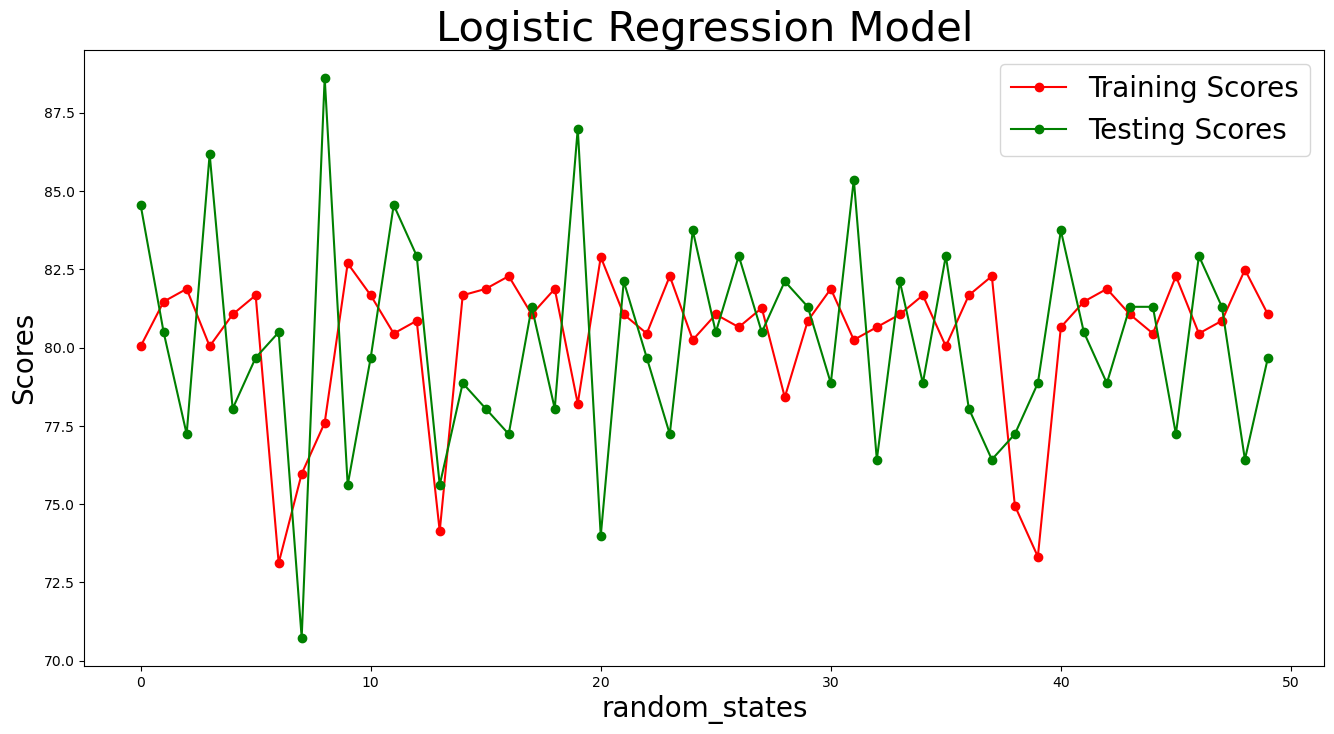

In [42]:
train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(X_train, y_train)
    
    train_score = logictic_model.score(X_train, y_train) * 100
    test_score = logictic_model.score(X_test, y_test) * 100
    
    logistic_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
#plt.savefig('../images/logistic_model_performance.png')
plt.show()

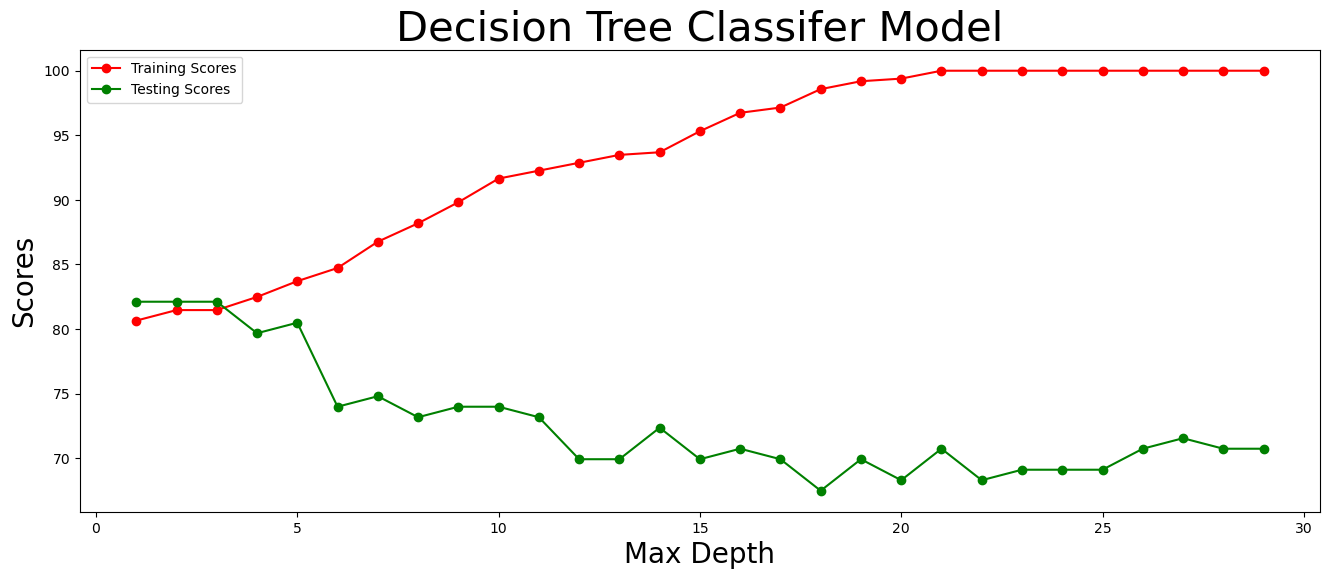

In [43]:
training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    decision_tree_classifier = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree_classifier.fit(X_train, y_train)
    training_scores.append(decision_tree_classifier.score(X_train, y_train) * 100)
    testing_scores.append(decision_tree_classifier.score(X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depth', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifer Model', fontsize = 30)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

# Building Optimum Model

In [44]:
# Extracting Features and Prediction column values
feature_values = feature_columns.values
prediction_values = loan_train['Loan_Status'].values

decision_tree_model = DecisionTreeClassifier(max_depth = 8)
decision_tree_model.fit(feature_values, prediction_values)

print("Score : ", decision_tree_model.score(feature_values, prediction_values) * 100)



Score :  85.34201954397395


In [45]:
# Loading Test Data
loan_test = pd.read_csv('C:/Users/Harshavardhan REDDY/Desktop/CodeClause/test_Y3wMUE5_7gLdaTN.csv')



In [46]:
# Selecting Prediction Features
loan_test = loan_test.loc[:, prediction_features]


In [47]:
# Dropping Records having null values on prediction features
loan_test = loan_test.dropna(how = 'any')


In [48]:
# Dropping Records having null values on prediction features
loan_test = loan_test.dropna()

In [49]:
# Encoding Categorical data into Numerical Data
loan_test['Dependents'] = loan_test['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])


In [50]:
# Predictions
loan_test['Loan_Status_Predicted'] = decision_tree_model.predict(loan_test.values)

In [51]:
loan_test['Loan_Status_Predicted'].replace(0,'NO',inplace=True)
loan_test['Loan_Status_Predicted'].replace(1,'YES',inplace=True)

In [52]:
loan_test.head(25)

,Credit_History,LoanAmount,ApplicantIncome,CoapplicantIncome,Dependents,Loan_Status_Predicted
0,1.0,110.0,5720,0,0,YES
1,1.0,126.0,3076,1500,1,YES
2,1.0,208.0,5000,1800,2,YES
4,1.0,78.0,3276,0,0,YES
5,1.0,152.0,2165,3422,0,YES
6,1.0,59.0,2226,0,1,NO
7,0.0,147.0,3881,0,2,NO
8,1.0,280.0,13633,0,2,YES
9,1.0,123.0,2400,2400,0,YES
10,1.0,90.0,3091,0,0,YES


# ****************************************THE END************************************************